## Faster RCNN

Set paths to imprtant folders

In [1]:
PATH_TO_IMAGES_FOLDER='images'
IMAGE_PATHS = 'test_images/'
PATH_TO_ANNOTATIONS_FOLDER='annotations'
PATH_TO_MODEL='Faster_RCNN_ResNet101_1024x1024'
PATH_TO_MODEL_DIR = 'exported-models/Faster_RCNN_ResNet101_1024x1024'
PATH_TO_LABELS = './annotations/label_map.pbtxt'

Tun off all loggings and enable GPU dynamic memory allocation

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)


# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Load the model and note the time to load the model

In [3]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load('exported-models/Faster_RCNN_ResNet101_1024x1024/saved_model/')

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 7.1462013721466064 seconds


The cell below creates index for the four bird types from label maps

In [4]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

At this stage, we can test our model by using unseen images of birds and see how it performs on these imges. the images are changed into tensors first because the API detections accepts tensors instead of images as input. The output will be the images with detection boxes with confidence scores and bird classes. To test the model fully, we have put images of single birds, multiple birs and also an image with all four birds together. We have kept the threshold to 85% and still all the birds are detected. Even at a threshold of 90% only two detection are missed.

Running inference for test_images/TM 3.jpg... Done
Running inference for test_images/PP-Multi.jpg... Done
Running inference for test_images/ER 2.jpg... Done
Running inference for test_images/TM 4.jpg... Done
Running inference for test_images/PA multi.jpg... Done
Running inference for test_images/PP 2.jpg... Done
Running inference for test_images/TM 1.jpg... Done
Running inference for test_images/ER-PA.jpg... Done
Running inference for test_images/PA 5.jpg... Done
Running inference for test_images/TM Multi.jpg... Done
Running inference for test_images/ER Multi.jpg... Done
Running inference for test_images/PA 3.jpg... Done
Running inference for test_images/PP 3.jpg... Done
Running inference for test_images/PA 2.jpg... Done
Running inference for test_images/PP 4.jpg... Done
Running inference for test_images/TM 2.jpg... Done
Running inference for test_images/ER 5.jpg... Done
Running inference for test_images/PP 1.jpg... Done
Running inference for test_images/PP 5.jpg... Done
Running infere

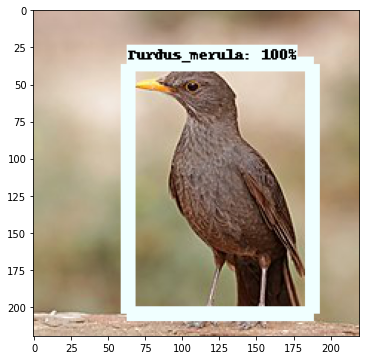

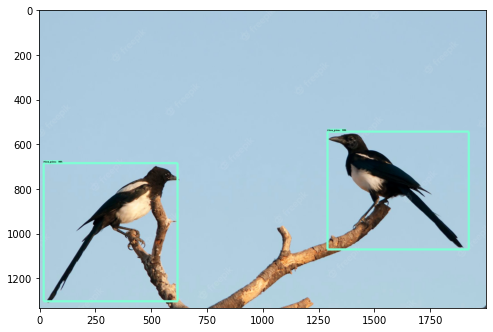

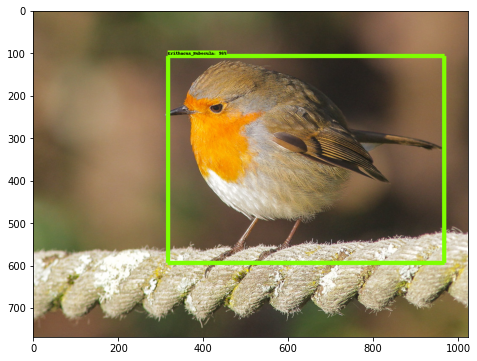

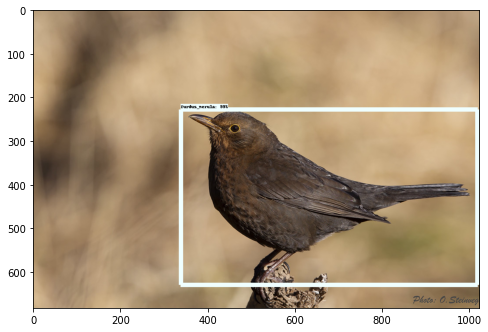

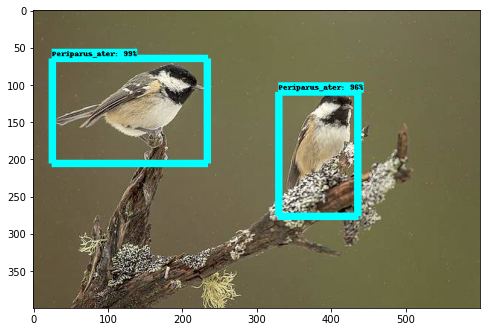

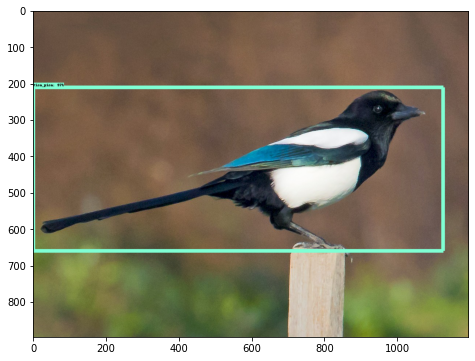

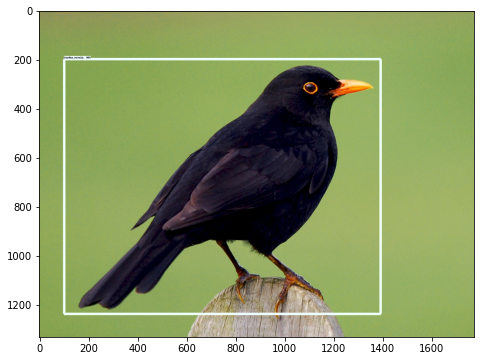

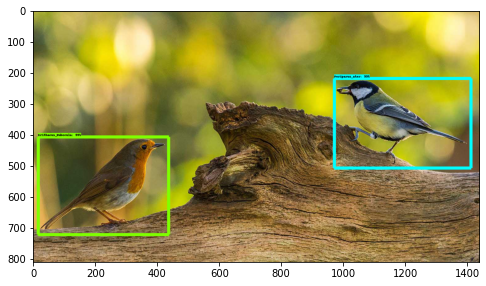

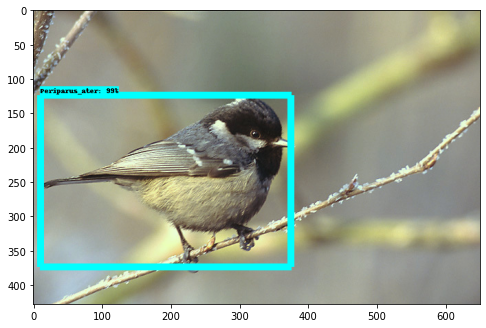

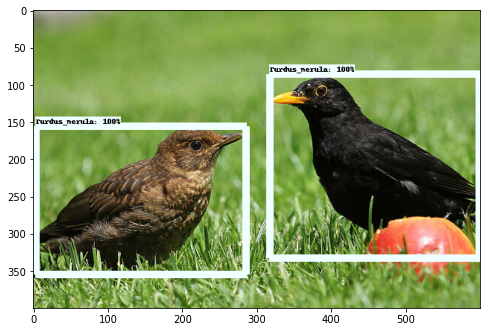

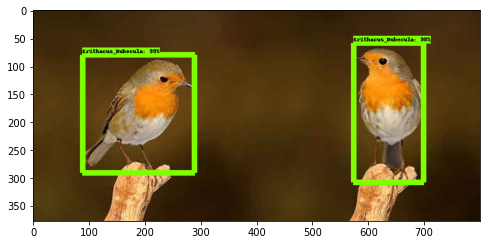

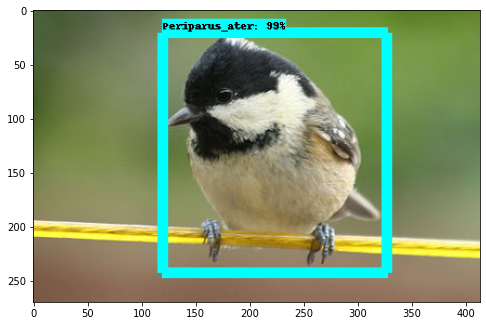

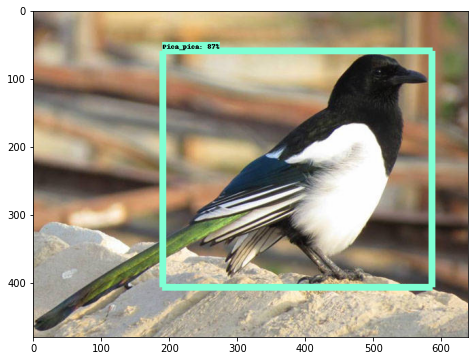

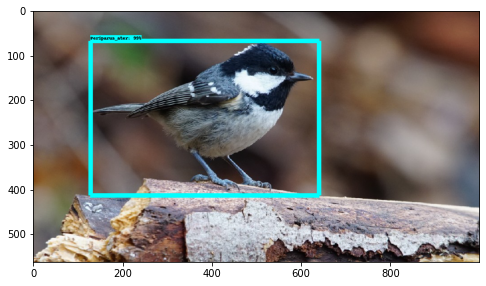

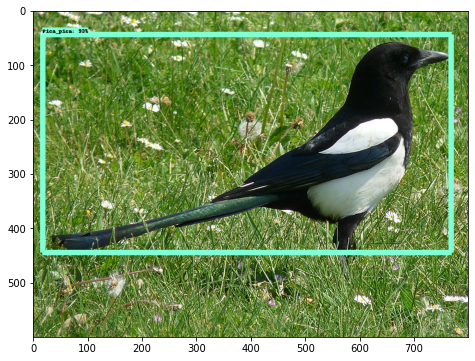

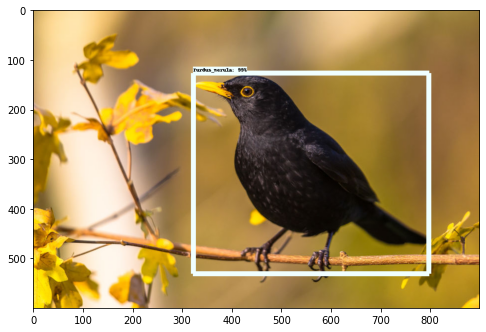

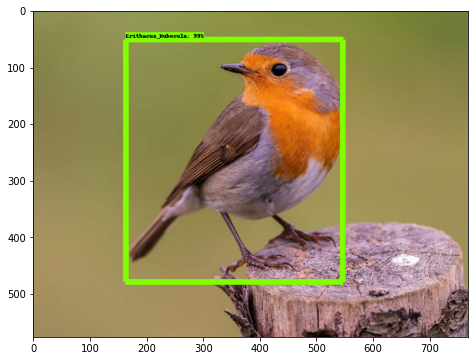

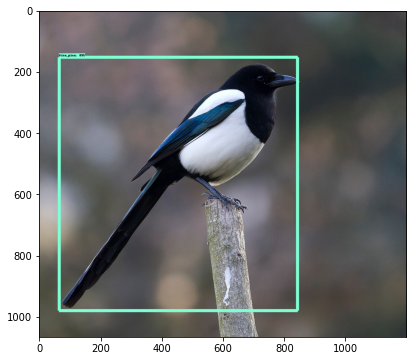

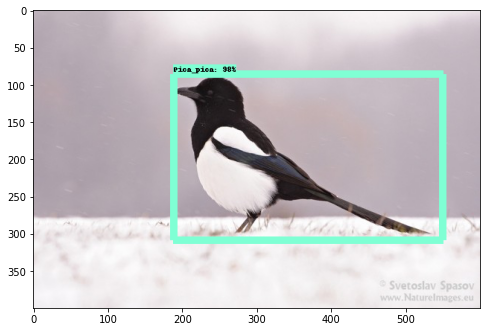

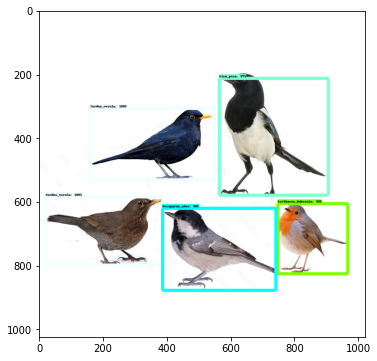

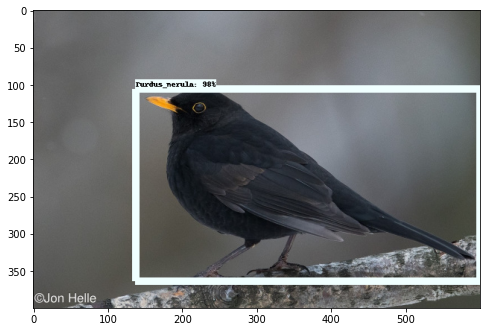

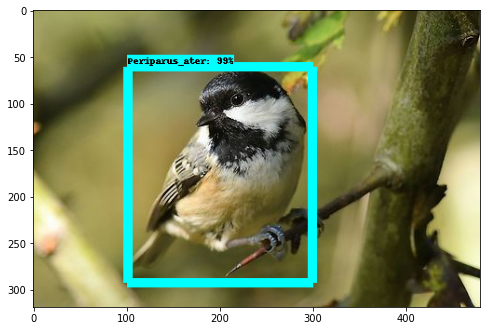

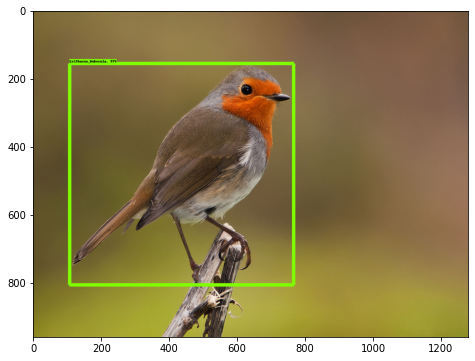

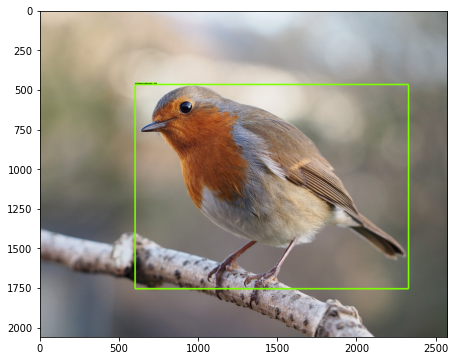

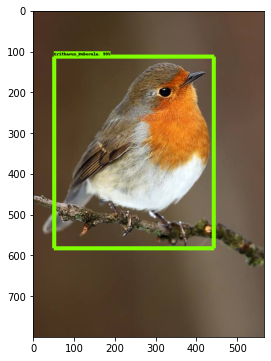

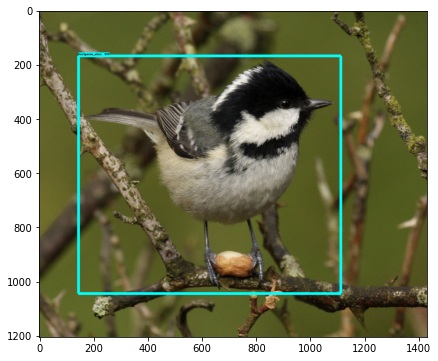

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings


# loop through the test image directory and peform detection on each image
for image_path in os.listdir(IMAGE_PATHS):
    image_path = os.path.join(IMAGE_PATHS, image_path) #joins each image's name in the directory to the path.
    

    print('Running inference for {}... '.format(image_path), end='')

    image_np = np.array(Image.open(image_path)) #uint8 numpy array with shape (img_height, img_width, 3)


    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.85,         #the threshold is set to .85, only boxes with confidence score
          line_thickness=10,                       # more than 85% will be detected
          agnostic_mode=False)

    plt.figure(figsize=(8, 6))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()